In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

# VẤN ĐỀ THỰC TẾ
Tóm tắt về tình hình thực tế: 1 công ty trong lĩnh vực Data Science tổ chức nhiều khóa đào tạo dành cho các ứng viên tiềm năng. Mỗi năm có rất nhiều người đăng ký tham gia, nhưng trong số họ:
- Một số thật sự muốn làm việc cho công ty sau khi hoàn thành khóa học (Nhóm 1)
- Một số chỉ muốn học để tìm công việc mới ở nơi khác (Nhóm 2)
=> Vậy làm sao để phân loại được ứng viên nào có khả năng nằm trong nhóm nào trong 2 nhóm đã đề cập => Dự đoán xem ứng viên có muốn đổi việc 

In [2]:
# Đọc dữ liệu từ file training
with open('../data/raw/aug_train.csv', 'r', encoding='utf-8') as f:
    header = f.readline().strip().split(',')
data = np.genfromtxt('../data/raw/aug_train.csv',delimiter = ',', dtype =str, skip_header = 1, encoding = 'utf-8')
print(header)
print(data[:1,:])

['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']
[['8949' 'city_103' '0.92' 'Male' 'Has relevent experience'
  'no_enrollment' 'Graduate' 'STEM' '>20' '' '' '1' '36' '1']]


## Thông tin các feature trong data
- enrollee_id            : ID ứng viên
- city                   : mã thành phố
- city_development_index : Chỉ số phát triển của thành phố (0-1)
- gender                 : giới tính
- relevent_experience    : Ứng viên có kinh nghiệm liên quan hay không
- enrolled_university    : Loại chương trình đại học đang theo học (nếu có)
- education_level        : Trình độ học vấn
- major_discipline       : Chuyên ngành đại học
- experience             : Tổng số năm kinh nghiệm
- company_size           : Quy mô công ty hiện tại
- company_type           : Loại công ty hiện tại
- last_new_job           : Thời gian giữa hai công việc gần nhất
- training_hours         : Tổng số giờ training đã hoàn thành
- target                 : muốn đổi việc hay không (0/1)

## Các câu hỏi đặt ra:
- Chúng ta có thể tìm hiểu được gì từ thông tin đào tạo của ứng viên khác nhau
- Liệu các yếu tố liên quan đến trình độ học vấn có ảnh hưởng đến khả năng đổi việc
- experience ảnh hưởng thế nào đến khả năng nghỉ việc?
- Khoảng thời gian giữa các công việc gần nhất (last_new_job) có tương quan gì với ý định nghỉ việc hiện tại?
- Trình độ học vấn (education_level) có tác động đáng kể đến tỷ lệ muốn đổi việc không
- Có mối liên hệ nào giữa chuyên ngành chính (major_discipline) và khả năng tìm kiếm công việc mới không?
- Tổng số giờ đào tạo (training_hours) khác nhau như thế nào giữa nhóm "Ở lại" và nhóm "Rời đi"?
- Chỉ số phát triển thành phố (city_development_index) ảnh hưởng thế nào đến sự ổn định của ứng viên?
- Quy mô công ty (company_size)  có liên quan đến xu hướng muốn rời đi không?

## TRỰC QUAN BIỂU ĐỒ

In [3]:
def plot_churn_rate(col_index, col_name, rotate_xticks=False):
    # Lấy dữ liệu cột feature và cột target (cột 13)
    col_data = data[:, col_index]
    target_data = data[:, 13]
    
    # Lọc bỏ các dòng có giá trị rỗng
    valid_mask = (col_data != '') & (target_data != '')
    col_clean = col_data[valid_mask]
    target_clean = target_data[valid_mask].astype(int)
    
    # Lấy các giá trị duy nhất
    unique_vals = np.unique(col_clean)
    churn_rates = []
    
    # Tính tỷ lệ target=1 cho từng giá trị
    for val in unique_vals:
        mask = (col_clean == val)
        total = np.sum(mask)
        if total > 0:
            leavers = np.sum(target_clean[mask])
            rate = (leavers / total) * 100
            churn_rates.append(rate)
        else:
            churn_rates.append(0)
            
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 5))
    bars = plt.bar(unique_vals, churn_rates, color='#66b3ff', edgecolor='black')
    
    plt.title(f'Tỷ lệ muốn đổi việc theo {col_name}', fontsize=14)
    plt.ylabel('Tỷ lệ đổi việc (%)', fontsize=12)
    plt.ylim(0, max(churn_rates) + 5 if churn_rates else 100) # Tăng giới hạn trục y chút cho đẹp
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Hiển thị con số cụ thể trên đầu cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{height:.1f}%', ha='center', va='bottom')
    
    if rotate_xticks:
        plt.xticks(rotation=45, ha='right')
        
    plt.show()

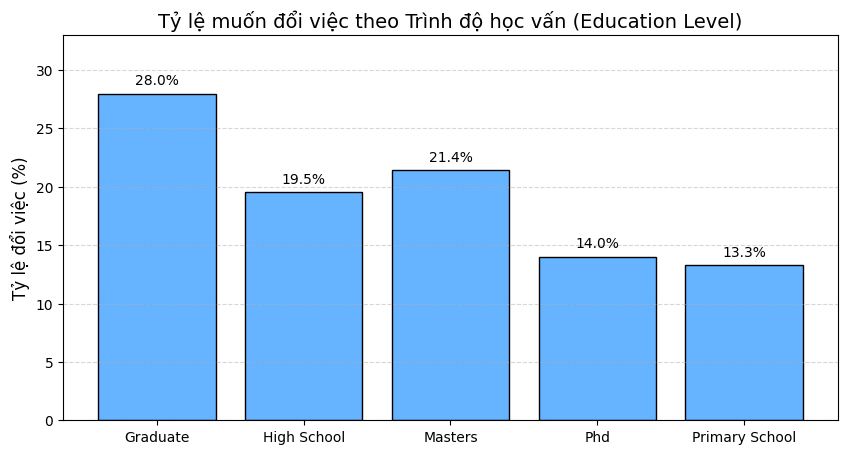

In [4]:
# 2. Education Level (Cột 6)
plot_churn_rate(6, 'Trình độ học vấn (Education Level)')

- Nhóm Graduate (Cử nhân) có tỷ lệ muốn đổi việc cao nhất (28%), cho thấy đây là nhóm có mức độ biến động nghề nghiệp lớn, có thể do thị trường lao động cạnh tranh hoặc nhu cầu tìm kiếm cơ hội tốt hơn.
- Nhóm Primary School và PhD có tỷ lệ thấp nhất (13,3% và 14%), phản ánh mức độ ổn định nghề nghiệp cao hơn, có thể vì ít lựa chọn công việc (đối với trình độ thấp) hoặc tính chất nghề nghiệp chuyên sâu và ổn định (đối với PhD).

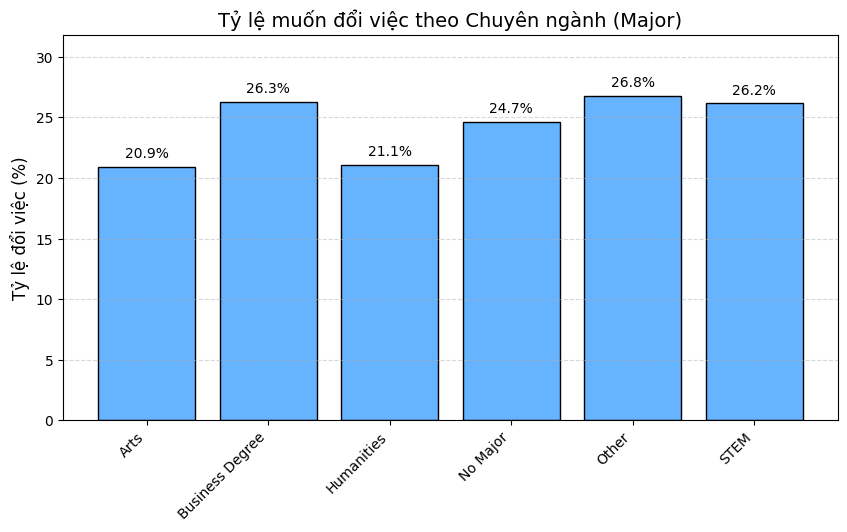

In [5]:
# Major Discipline 
plot_churn_rate(7, 'Chuyên ngành (Major)', rotate_xticks=True)

- Các nhóm Other (26,8%), Business Degree (26,3%) và STEM (26,2%) có tỷ lệ muốn đổi việc cao nhất, cho thấy người thuộc các nhóm này có xu hướng tìm kiếm cơ hội mới hoặc thị trường lao động biến động mạnh.
- Nhóm Arts (20,9%) và Humanities (21,1%) có tỷ lệ thấp hơn, phản ánh sự ổn định nghề nghiệp cao hơn hoặc ít lựa chọn việc làm thay thế.
##### Các chuyên ngành mang tính ứng dụng rộng (Business, STEM, Other) có tỷ lệ muốn đổi việc cao hơn so với nhóm thiên về xã hội – nghệ thuật.

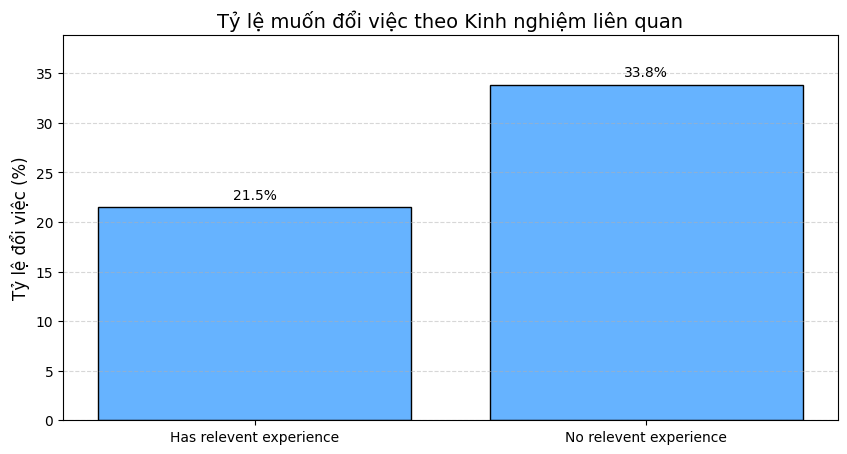

In [6]:
#  Relevent Experience 
plot_churn_rate(4, 'Kinh nghiệm liên quan')

- Nhóm không có kinh nghiệm liên quan có tỷ lệ muốn đổi việc rất cao (33,8%), cho thấy họ dễ cảm thấy không phù hợp với công việc hiện tại hoặc khó phát triển trong vai trò đang đảm nhiệm.
- Nhóm có kinh nghiệm liên quan chỉ có tỷ lệ 21,5%, thấp hơn đáng kể. Điều này cho thấy những người làm đúng chuyên môn thường cảm thấy phù hợp hơn, ổn định hơn và ít có nhu cầu rời bỏ công việc.

In [7]:
def parse_experience(x):
    if x == "<1":
        return 0
    if x == ">20":
        return 21
    try:
        return int(x)
    except:
        return np.nan

def safe_int(x):
    try:
        return int(float(x))
    except:
        return np.nan
def safe_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [8]:
raw_experience = data[:, 8]
raw_targets = data[:, 13]

# Áp dụng hàm tiền xử lý để có mảng số
experience_numeric = np.array([parse_experience(x) for x in raw_experience])
targets_numeric = np.array([safe_int(x) for x in raw_targets])

# Lọc missing value
nan_mask = ~np.isnan(experience_numeric)
experience_clean = experience_numeric[nan_mask]
targets_clean = targets_numeric[nan_mask]

# Tính toán Tỷ lệ Đổi việc cho từng mốc năm kinh nghiệm
unique_years = np.unique(experience_clean)
unique_years = np.sort(unique_years)

exp_churn_rates = []

for year in unique_years:
    mask = (experience_clean == year)
    
    # Tính tỷ lệ đổi việc (Target=1 / Tổng số)
    rate = np.mean(targets_clean[mask]) * 100
    exp_churn_rates.append(rate)

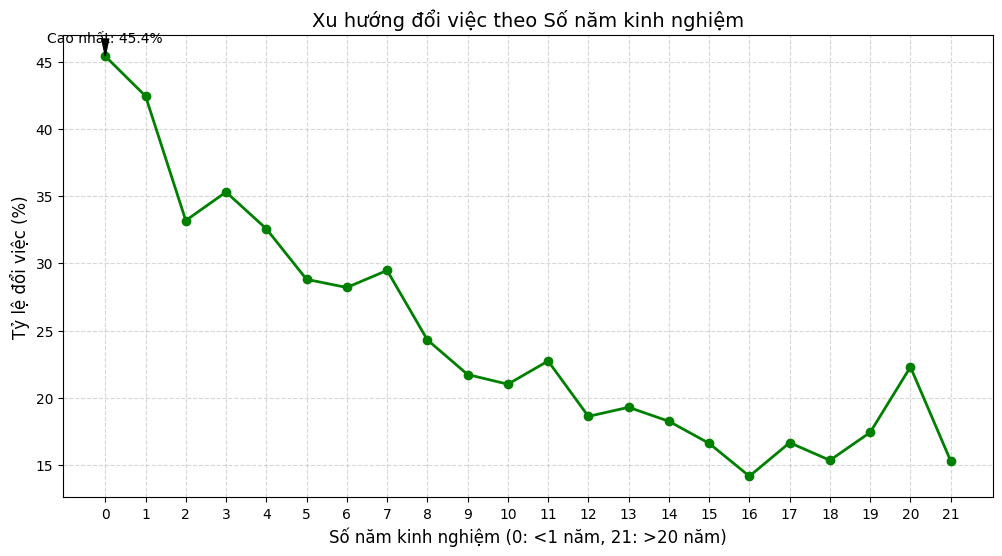

In [9]:

plt.figure(figsize=(12, 6))
plt.plot(unique_years, exp_churn_rates, marker='o', linestyle='-', color='green', linewidth=2)

plt.title('Xu hướng đổi việc theo Số năm kinh nghiệm', fontsize=14)
plt.xlabel('Số năm kinh nghiệm (0: <1 năm, 21: >20 năm)', fontsize=12) 
plt.ylabel('Tỷ lệ đổi việc (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(unique_years) 

# Chú thích điểm cao nhất
max_idx = np.argmax(exp_churn_rates)
plt.annotate(f'Cao nhất: {exp_churn_rates[max_idx]:.1f}%', 
             (unique_years[max_idx], exp_churn_rates[max_idx]), 
             xytext=(0, 10), textcoords='offset points', ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5))
             
plt.show()

- Biểu đồ cho thấy tỷ lệ thay đổi việc làm cao nhất ở nhóm người có dưới 1 năm kinh nghiệm (khoảng 45%) và giảm dần khi số năm kinh nghiệm tăng.
- Người có từ 3 đến 15 năm kinh nghiệm có tỷ lệ thay đổi ổn định từ 20-30%, trong khi nhóm có trên 20 năm kinh nghiệm có sự biến động nhẹ nhưng tỷ lệ thay đổi vẫn thấp.
-  Điều này phản ánh xu hướng người lao động ít kinh nghiệm thay đổi công việc nhiều hơn, còn người có nhiều năm kinh nghiệm ít thay đổi công việc.

C:\Users\DELL\AppData\Local\Temp\ipykernel_15608\3539273632.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = plt.boxplot(


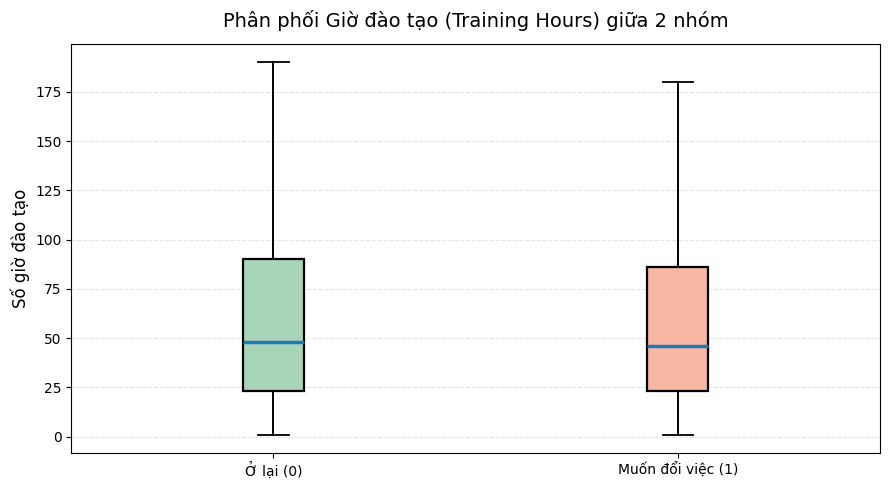

In [10]:
training_hours = data[:, 12].astype(float)   
targets = data[:, 13].astype(int)            

# Tách dữ liệu theo hai nhóm
hours_stay = training_hours[targets == 0]
hours_leave = training_hours[targets == 1]

plt.figure(figsize=(9, 5))

# Boxplot
bplot = plt.boxplot(
    [hours_stay, hours_leave],
    labels=['Ở lại (0)', 'Muốn đổi việc (1)'],
    patch_artist=True,
    notch=False,
    showmeans=False,
    showfliers=False,
    boxprops=dict(linewidth=1.6),
    whiskerprops=dict(linewidth=1.4),
    capprops=dict(linewidth=1.3),
    medianprops=dict(color="#1f77b4", linewidth=2.5)
)

colors = ['#A8D5BA', '#F7B7A3']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Phân phối Giờ đào tạo (Training Hours) giữa 2 nhóm',
          fontsize=14, pad=12)
plt.ylabel('Số giờ đào tạo', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.35)

plt.tight_layout()
plt.show()


- Phân phối số giờ đào tạo giữa hai nhóm “Ở lại” và “Muốn đổi việc” khá tương đồng, với trung vị của cả hai nhóm đều xấp xỉ nhau
- Tuy nhóm muốn đổi việc có phạm vi giá trị trải rộng hơn một chút, nhưng không có sự khác biệt rõ rệt về mức độ đào tạo giữa hai nhóm
- Điều này cho thấy số giờ đào tạo dường như không phải yếu tố quyết định trực tiếp đến việc một nhân viên có muốn đổi việc hay không.

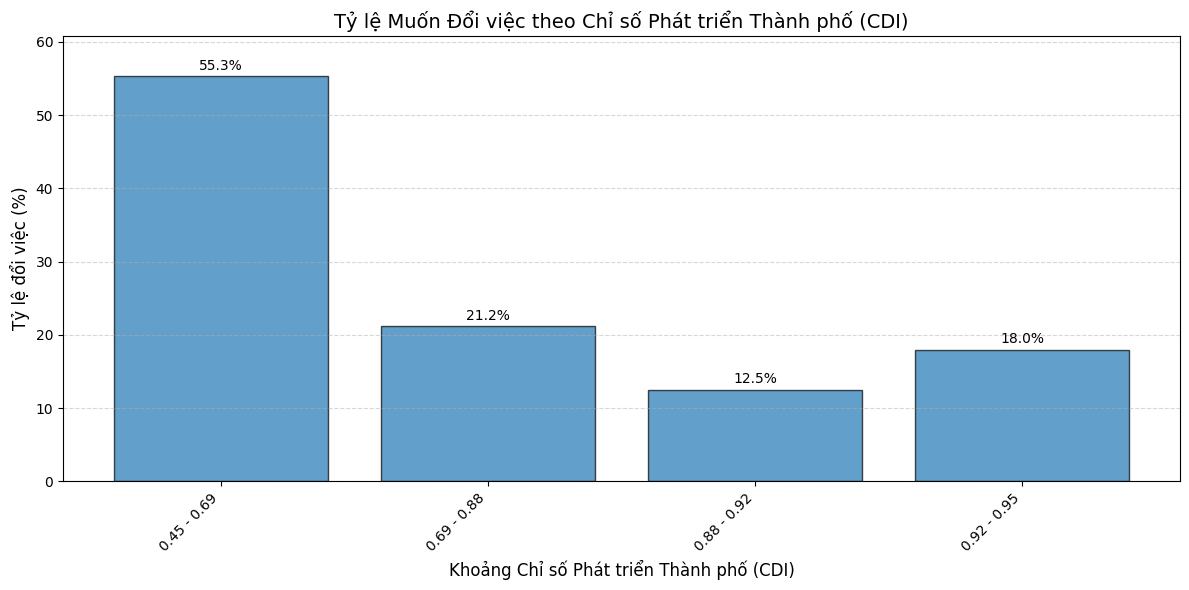

In [11]:
cdi_numeric = np.array([safe_float(x) for x in data[:, 2]])
targets_numeric = np.array([safe_int(x) for x in data[:, 13]]) 
# Lọc missing value
clean_mask = ~np.isnan(cdi_numeric) & ~np.isnan(targets_numeric)
cdi_clean = cdi_numeric[clean_mask]
targets_clean = targets_numeric[clean_mask]

# Chia bin
N_BINS = 5
quantiles = np.linspace(0, 100, N_BINS + 1)
bin_edges = np.percentile(cdi_clean, quantiles)
bin_edges = np.unique(bin_edges) # Đảm bảo không có cạnh trùng lặp

bin_labels = []
churn_rates = []

for i in range(len(bin_edges) - 1):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i+1]
    
    if i < len(bin_edges) - 2:
        mask = (cdi_clean >= lower_bound) & (cdi_clean < upper_bound)
    else:
        mask = (cdi_clean >= lower_bound) & (cdi_clean <= upper_bound)

    if np.sum(mask) > 0:
        rate = np.mean(targets_clean[mask]) * 100
    else:
        rate = 0
    
    bin_labels.append(f'{lower_bound:.2f} - {upper_bound:.2f}')
    churn_rates.append(rate)

# Bar chart 
plt.figure(figsize=(12, 6))

bars = plt.bar(bin_labels, churn_rates, color='#1f77b4', edgecolor='black', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom')

plt.title('Tỷ lệ Muốn Đổi việc theo Chỉ số Phát triển Thành phố (CDI)', fontsize=14)
plt.xlabel('Khoảng Chỉ số Phát triển Thành phố (CDI)', fontsize=12)
plt.ylabel('Tỷ lệ đổi việc (%)', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(churn_rates) * 1.1 if churn_rates else 30)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Tỷ lệ người có nhu cầu đổi việc cao nhất ở các thành phố có CDI từ 0.45 đến 0.69, chiếm tới 55.3%
- Tỷ lệ này giảm dần khi CDI tăng lên, với 21.2% ở khoảng CDI 0.69 - 0.88, 12.5% ở khoảng CDI 0.88 - 0.92, và thấp nhất là 18.0% ở khoảng CDI 0.92 - 0.95.
- Khi chỉ số phát triển thành phố càng cao, nhu cầu thay đổi công việc của người dân có xu hướng giảm

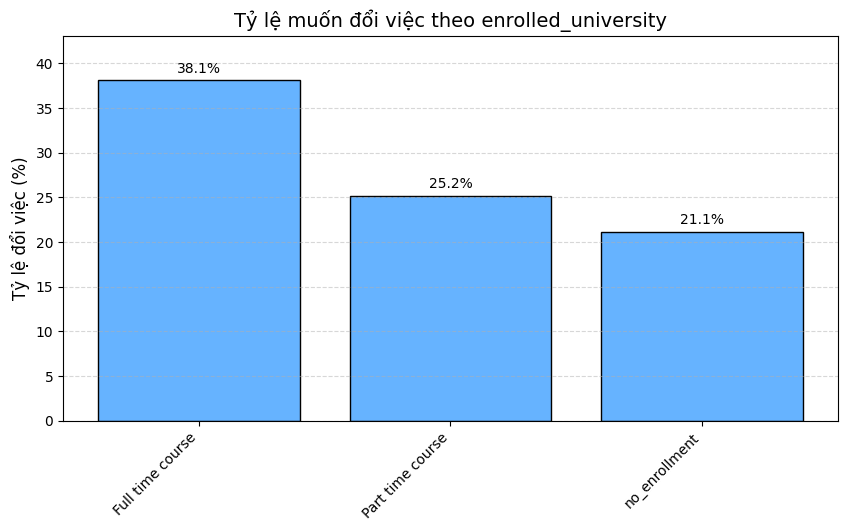

In [12]:
plot_churn_rate(5, 'enrolled_university', rotate_xticks=True)

- Nhóm theo học full-time có tỷ lệ muốn đổi việc cao nhất, lên tới 38.1%, cho thấy những người này có thể chịu áp lực lớn hơn hoặc kỳ vọng cao hơn về môi trường làm việc
- Nhóm theo học part-time có tỷ lệ thấp hơn, ở mức 25.2%, phản ánh mong muốn ổn định hơn do vừa học vừa làm.
- Nhóm không theo học lại có tỷ lệ thấp nhất, 21.1%, cho thấy họ ít có xu hướng thay đổi công việc hơn.
- Tổng thể, mức độ gắn kết với việc học có liên quan đến nhu cầu thay đổi công việc, với xu hướng tỷ lệ muốn đổi việc cao hơn khi mức độ theo học toàn thời gian tăng.

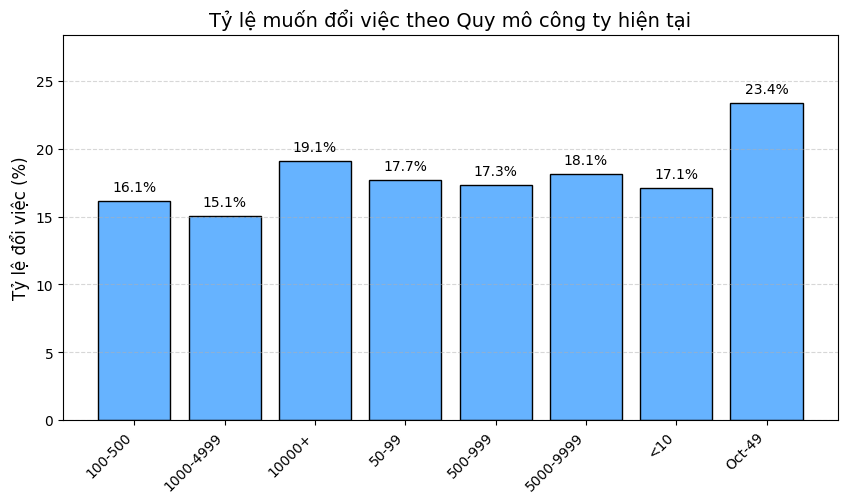

In [13]:
plot_churn_rate(9, 'Quy mô công ty hiện tại', rotate_xticks=True)

- Nhân viên làm việc tại các công ty rất nhỏ (0–49 người) có tỷ lệ muốn đổi việc cao nhất, đạt 23.4%, có thể do môi trường hạn chế về cơ hội thăng tiến hoặc phúc lợi.
- Ngược lại, nhóm làm việc tại các công ty quy mô 1000–4999 người có tỷ lệ thấp nhất, chỉ 15.1%, cho thấy mức độ ổn định và hài lòng cao hơn.
- Các nhóm quy mô trung bình và lớn khác dao động từ 16% đến 19%, không có biến động quá lớn.
- Nhìn chung, quy mô công ty càng nhỏ thì tỷ lệ muốn đổi việc có xu hướng cao hơn, trong khi các công ty lớn mang lại sự ổn định khiến nhân viên ít có ý định thay đổi công việc hơn.

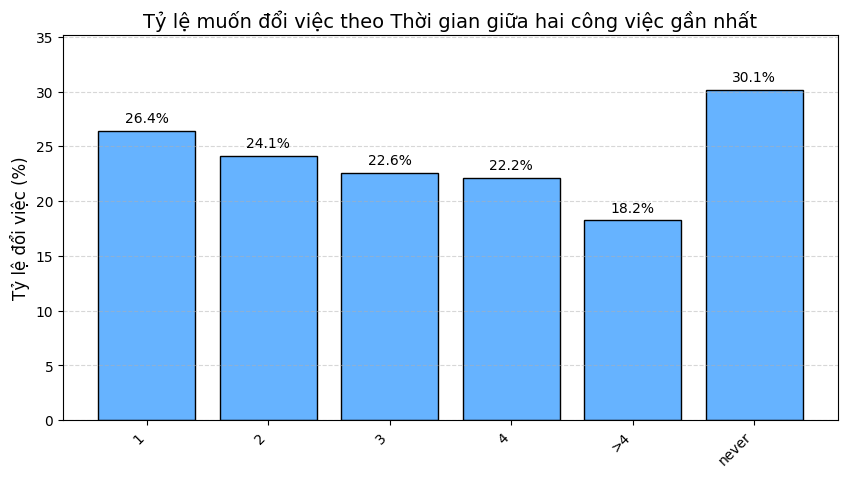

In [14]:
plot_churn_rate(11, 'Thời gian giữa hai công việc gần nhất', rotate_xticks=True)

- Tỷ lệ cao nhất là trong vòng dưới 1 năm (26.4%), sau đó giảm dần khi thời gian làm việc kéo dài.
- Tỷ lệ thay đổi công việc ở các khoảng 1-2 năm và 2-3 năm lần lượt là 24.1% và 22.6%.
- Đặc biệt, tỷ lệ "never" (không bao giờ thay đổi) lên tới 30.1%, cho thấy nhiều người ưu tiên sự ổn định trong công việc dài hạn.

#### NHẬN XÉT CHUNG
- Những nhóm dễ có xu hướng đổi việc hơn thường là người trẻ, ít kinh nghiệm, học toàn thời gian, làm trái chuyên môn hoặc làm trong môi trường ít cơ hội phát triển (công ty nhỏ, ngành cạnh tranh như Business và STEM).
-  Ngược lại, nhu cầu thay đổi công việc giảm đáng kể ở những nhóm có kinh nghiệm lâu năm, làm đúng chuyên môn, làm việc trong tổ chức lớn hoặc sống tại các thành phố có mức độ phát triển cao, vốn mang lại sự ổn định và hài lòng hơn.
-  Bên cạnh đó, các yếu tố như số giờ đào tạo không cho thấy tác động rõ rệt đến quyết định nghỉ việc.
-  Nhìn chung, sự ổn định nghề nghiệp gia tăng khi kinh nghiệm, mức độ phù hợp chuyên môn và chất lượng môi trường sống – làm việc được cải thiện, trong khi cạnh tranh nghề nghiệp, kỳ vọng cao và thiếu phù hợp công việc là những động lực chính khiến người lao động cân nhắc thay đổi công việc.